# Assignment 2 : Machine Learning and Adaptive Intelligence
## COM4509
### The University Of Sheffield

## Logistic Regression on BreastMNIST
### B1. Data Loading and Inspection

In [13]:
import numpy as np
import pandas as pd
import time
import platform
import sys
import math
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torchvision import datasets
import medmnist
import subprocess
import sys
platform.python_version()

'3.8.3'

In [74]:
# Had to search for this function because I had trouble installing this module
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
#install('medmnist')

In [75]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [76]:
np.random.seed(88246)
torch.manual_seed(88246)

In [77]:
from medmnist import INFO, Evaluator
# This below is copied and pasted from the GITHUB repositery for MEDMNIST

data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 20
BATCH_SIZE = 32
learning_rate = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [78]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)

pil_train_dataset = DataClass(split='train', download=download)
pil_test_dataset = DataClass(split='test', download=download)
pil_val_dataset = DataClass(split='val', download=download)


# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = data.DataLoader(dataset=val_dataset, shuffle=False)

Using downloaded and verified file: /Users/maximefontana/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/breastmnist.npz


In [79]:
print(train_dataset)
print("===================")
print(test_dataset)
print("===================")
print(val_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: /Users/maximefontana/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0
Dataset BreastMNIST (breastmnist)
    Number of datapoints: 156
    Root location: /Users/maximefontana/.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning of 

torch.Size([32, 1, 28, 28])
torch.Size([32, 1])
Labels count : [11. 38.]
Classes counts at least 10 : True


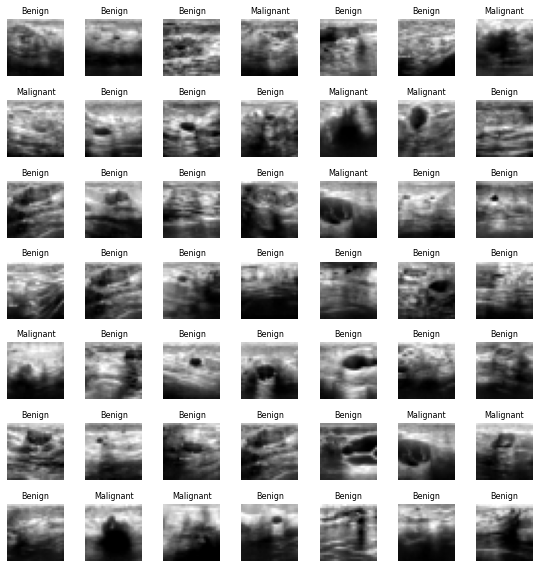

In [80]:
from torch.utils.data import Dataset, DataLoader

global classes
classes = {0: "Malignant",
          1 : "Benign"}

for x, y in train_loader:
    print(x.shape)
    print(y.shape)
    break
    

def display_instances(dataset, cols, rows):
    figure = plt.figure(figsize=(8, 8))
    malignant_count = 0
    benign_count = 0
    global classes
    labels = np.zeros(len(classes))
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        img_label = label[0]
        labels[img_label] +=1   
        plt.title(classes[img_label], fontsize = 8)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
        figure.tight_layout()
        my_condition = np.all(labels >= 10)
    print('Labels count :' , labels)
    print('Classes counts at least 10 :' , my_condition)
        
# show images
display_instances(train_dataset, 7, 7)

Labels count : [15. 34.]
Classes counts at least 10 : True


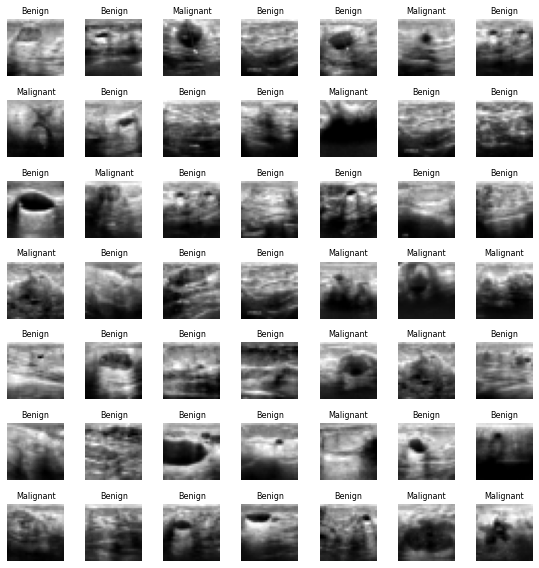

In [81]:
display_instances(test_dataset, 7, 7)

Labels count : [16. 33.]
Classes counts at least 10 : True


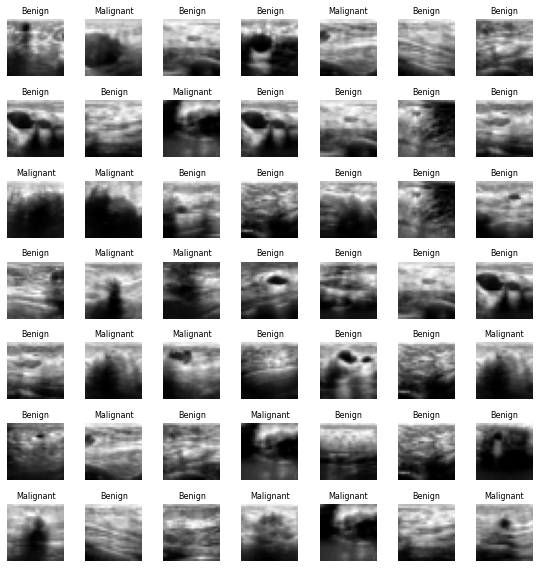

In [82]:
display_instances(val_dataset, 7, 7)

### B2. Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

def vectorisation(dataset):
    targets = []
    labels = []
    
    for i in range(len(dataset)):
        targets.append((dataset[i][0].numpy().squeeze()).reshape(-1))
        labels.append(dataset[i][1][0])
    
    targets = np.array(targets)
    labels = np.array(labels)
    
    return targets, labels

X_Train, y_Train = vectorisation(train_dataset)
X_Val, y_Val = vectorisation(val_dataset)
X_Test, y_Test = vectorisation(test_dataset)

t0 = time.time()
clf = LogisticRegression(random_state=42, max_iter=500, solver = 'liblinear').fit(X_Train, y_Train)
training_time = time.time() - t0
print('{} seconds'.format(training_time))
print(clf.get_params())

0.14700698852539062 seconds
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = {'penalty':('l2', 'l1')}
search = GridSearchCV(clf, parameters)
search.fit(X_Val, y_Val)
print(search.best_params_)

train_predictions = search.predict(X_Train) 
val_predictions = search.predict(X_Val) 
test_predictions = search.predict(X_Test) 

# Here we are multiplying by 100 to compare with the results
m1_acc = accuracy_score(y_Train, train_predictions) * 100
m2_acc = accuracy_score(y_Val, val_predictions) * 100
m3_acc = accuracy_score(y_Test, test_predictions) * 100

print("M1 :", m1_acc)
print("M2 :", m2_acc)
print("M3 :", m3_acc)

{'penalty': 'l1'}
M1 : 72.89377289377289
M2 : 92.3076923076923
M3 : 71.7948717948718


In [85]:
# Common Pytorch method
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [86]:
from torch.autograd import Variable
import torch.nn.functional as F

reg_params = [0.001, 0.01, 0.1, 0.2, 0.3]

input_dim = 28*28
out_dim = 2

model = LogisticRegressionModel(input_dim, out_dim)
criterion = torch.nn.CrossEntropyLoss() # Exactly as in sklearn

def compute_accuracy(data_loader, model):
    correct = 0
    total = 0
    for images, labels in data_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        '''if predicted == labels.squeeze():
            correct += 1'''
        correct += (predicted == labels.squeeze()).sum() 
    accuracy = 100 * correct/total
    return accuracy.item()

for i in range(len(reg_params)):
    t0 = time.time()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=reg_params[i])
    print('Regularisation parmeter currently being tested (15 epochs):' , reg_params[i])
    for epoch in range(NUM_EPOCHS):
        for images, labels in train_loader: # go through the batch at each iteration

            images = Variable(images.view(-1, 28*28), requires_grad=True)
            labels = Variable(labels.squeeze())
            
            optimizer.zero_grad()

            # Forward pass
            output = model(images)
            
            loss = criterion(output, labels)
            
            # Backward pass
            loss.backward()
            
            optimizer.step() # update gradients
            
    training_time = time.time() - t0
    #print('{} seconds'.format(training_time))
    accuracy = compute_accuracy(val_loader, model)
    print('Accuracy on Val :' , accuracy)


Regularisation parmeter currently being tested (15 epochs): 0.001
Accuracy on Val : 76.92308044433594
Regularisation parmeter currently being tested (15 epochs): 0.01
Accuracy on Val : 79.4871826171875
Regularisation parmeter currently being tested (15 epochs): 0.1
Accuracy on Val : 84.61538696289062
Regularisation parmeter currently being tested (15 epochs): 0.2
Accuracy on Val : 85.8974380493164
Regularisation parmeter currently being tested (15 epochs): 0.3
Accuracy on Val : 85.8974380493164


In [87]:
optimizer.weight_decay = 0.2

training_acc = compute_accuracy(train_loader, model)
val_acc = compute_accuracy(val_loader, model)
test_acc = compute_accuracy(test_loader, model)

print('Accuracy on Training Set :', training_acc)
print('Accuracy on Validation Set :', val_acc)
print('Accuracy on Testing Set :', test_acc)

Accuracy on Training Set : 77.83882904052734
Accuracy on Validation Set : 85.8974380493164
Accuracy on Testing Set : 78.20513153076172


### B3. Performance Comparison 

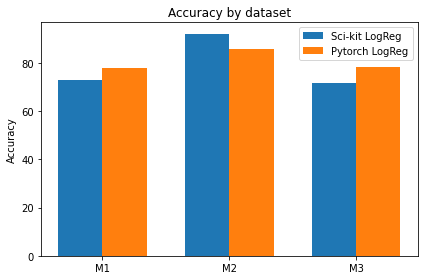

In [88]:
labels = ['M1', 'M2', 'M3']

sci_kit_models = [m1_acc, m2_acc, m3_acc]
py_torch_models = [training_acc, val_acc, test_acc]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sci_kit_models, width, label='Sci-kit LogReg')
rects2 = ax.bar(x + width/2, py_torch_models, width, label='Pytorch LogReg')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

Firstly, the validation accuracy is always higher since we always fine-tune with respect to it.
Also, we can see the correlation between the accuracy on the training set and the testing set, this makes sure that overfitting has not happened 

## C.  Convolutional Neural Networks on OCTMNIST

### C1. Data Loading and Inspection

In [90]:
data_flag = 'octmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)

pil_train_dataset = DataClass(split='train', download=download)
pil_test_dataset = DataClass(split='test', download=download)
pil_val_dataset = DataClass(split='val', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = data.DataLoader(dataset=val_dataset, shuffle=False)

Using downloaded and verified file: /Users/maximefontana/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/maximefontana/.medmnist/octmnist.npz


In [91]:
print(train_dataset)
print("===================")
print(test_dataset)
print("===================")
print(val_dataset)

Dataset OCTMNIST (octmnist)
    Number of datapoints: 97477
    Root location: /Users/maximefontana/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'choroidal neovascularization', '1': 'diabetic macular edema', '2': 'drusen', '3': 'normal'}
    Number of samples: {'train': 97477, 'val': 10832, 'test': 1000}
    Description: The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−1,536)×(277−512). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0
Dataset OCTMNIST (octmnist)
    Number of datapoints: 1000
    Root location: /Users/maximefontana/.medm

torch.Size([32, 1, 28, 28])
torch.Size([32, 1])
Labels count : [28. 10. 10. 52.]
Classes counts at least 10 : True


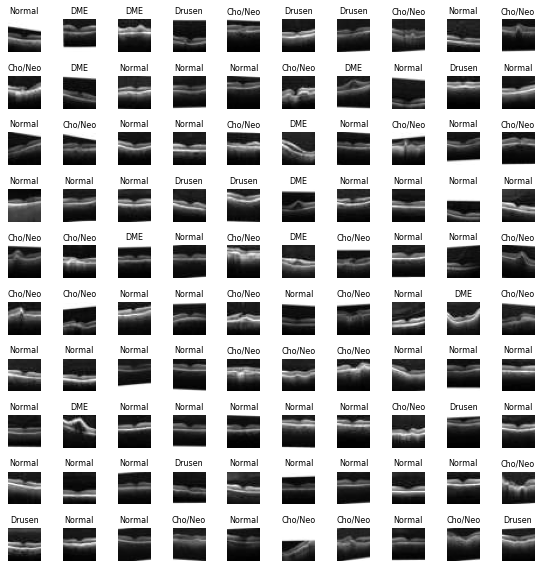

In [92]:
classes = {0: "Cho/Neo",
          1 : "DME",
          2 : "Drusen",
          3 : "Normal"}

for x, y in train_loader:
    print(x.shape)
    print(y.shape)
    break
    
display_instances(train_dataset, cols=10, rows=10)

### C2. Convolutional Neural Networks

In [94]:
padding = False
increasing_kernel = False

class my_2_2_CNN(nn.Module):
    def __init__(self):
        super(my_2_2_CNN, self).__init__()
        
        if padding and increasing_kernel:
            self.conv1 = nn.Conv2d(1, 3, 3, padding = 2)
            self.conv2 = nn.Conv2d(3, 9, 5, padding = 2)
        elif padding:
            self.conv1 = nn.Conv2d(1, 3, 3, padding = 2)
            self.conv2 = nn.Conv2d(3, 9, 3, padding = 2)
        else:
            self.conv1 = nn.Conv2d(1, 3, 3) 
            self.conv2 = nn.Conv2d(3, 9, 3)
            
        self.pool = nn.MaxPool2d(2, 2)
        
        if padding and increasing_kernel:
            self.fc1 = nn.Linear(9 * 7 * 7, 100)
        elif padding:
            self.fc1 = nn.Linear(9 * 8 * 8, 100)
        else:
            self.fc1 = nn.Linear(9*5*5, 100)
            
        self.fc2 = nn.Linear(100, 4)
            
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        if padding and increasing_kernel:
            x = x.view(-1, 9*7*7)
        elif padding:
            x = x.view(-1, 9*8*8)
        else:
            x = x.view(-1, 9 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [96]:
max_epochs = 5

for i in range(3):
    if i == 0:
        padding = False
        increasing_kernel = False
    elif i == 1:
        padding = True
        increasing_kernel = False
    elif i == 2:
        padding = True
        increasing_kernel = True
    myCNN = my_2_2_CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(myCNN.parameters(), lr=0.001, momentum=0.9)
    print(myCNN)
    print(padding, increasing_kernel)
    t0 = time.time()
    for epoch in range(max_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0
        for y, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            labels = labels.squeeze()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = myCNN(inputs)
            #print(outputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if y % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, y + 1, running_loss / 2000))
                running_loss = 0.0
    
    PATH = 'data/cnn_2_2_' + str(i) + '.pth' 
    torch.save(myCNN.state_dict(), PATH)
    print('Finished Training!')
    training_time = time.time() - t0
    print(print('{} seconds'.format(training_time)))
    correct = 0
    total = 0
    with torch.no_grad():  #testing phase, no need to compute the gradients to save time
        for data in val_loader:
            images, labels = data
            #labels = labels.squeeze()
            outputs = myCNN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print('Accuracy of the network on the val images: %d %%' % (100 * correct / total))
    if i == 0:
        current_best = accuracy
        best_tuple = [i, training_time, current_best]
    if accuracy > current_best:
        current_best = accuracy
        best_tuple = [i, training_time, current_best]
        
print('Best Performing Model :' , best_tuple)

my_2_2_CNN(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=225, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)
False False
[1,  2000] loss: 1.159
[2,  2000] loss: 0.980
[3,  2000] loss: 0.749
[4,  2000] loss: 0.649
[5,  2000] loss: 0.589
Finished Training!
129.00817584991455 seconds
None
Accuracy of the network on the 10000 val images: 80 %
my_2_2_CNN(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=576, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)
True False
[1,  2000] loss: 1.146
[2,  2000] loss: 0.896
[

### We now test our model on our training and testing set

In [97]:
best = best_tuple[0]
if best == 0:
    padding = False
    increasing_kernel = False
elif best == 1:
    padding = True
    increasing_kernel = False
elif best == 2:
    padding = True
    increasing_kernel = True

loadCNN = my_2_2_CNN()
loadCNN.load_state_dict(torch.load('data/cnn_2_2_' + str(best) + '.pth'))

correct = 0
total = 0
with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in train_loader:
        images, labels = data
        labels = labels.squeeze()
        outputs = loadCNN(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    training_accuracy = 100 * correct / total  
print('Accuracy of the network on the train images: %d %%' % (100 * correct / total))

correct = 0
total = 0
with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in test_loader:
        images, labels = data
        labels = labels.squeeze()
        outputs = loadCNN(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    testing_accuracy = 100 * correct / total  
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

layer_2_model_accs = [training_accuracy, best_tuple[2], testing_accuracy]
layer_2_training_time = best_tuple[1]

Accuracy of the network on the train images: 80 %
Accuracy of the network on the test images: 60 %


#### We have now kept record of the best performing model

In [98]:
padding = False
increasing_kernel = False

class my_3_3_CNN(nn.Module):
    def __init__(self):
        super(my_3_3_CNN, self).__init__()
        
        if padding and increasing_kernel:
            self.conv1 = nn.Conv2d(1, 3, 3, padding = 2) 
            self.conv2 = nn.Conv2d(3, 9, 5, padding = 2)
            self.conv3 = nn.Conv2d(9, 18, 7, padding = 2)
        elif padding:
            self.conv1 = nn.Conv2d(1, 3, 3, padding = 2)
            self.conv2 = nn.Conv2d(3, 9, 3, padding = 2)
            self.conv3 = nn.Conv2d(9, 18, 3, padding = 2)
        else:
            self.conv1 = nn.Conv2d(1, 3, 3)
            self.conv2 = nn.Conv2d(3, 9, 3)
            self.conv3 = nn.Conv2d(9, 18, 3)
            
        self.pool = nn.MaxPool2d(2, 2)
        
        if padding and increasing_kernel:
            self.fc1 = nn.Linear(18 * 2 * 2, 100)
        elif padding:
            self.fc1 = nn.Linear(18 * 5 * 5, 100)
        else:
            self.fc1 = nn.Linear(18 * 1 * 1, 100)
            
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        if padding and increasing_kernel:
            x = x.view(-1, 18 * 2 * 2)
        elif padding:
            x = x.view(-1, 18 * 5 * 5)
        else:
            x = x.view(-1, 18 * 1 * 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [99]:
for i in range(3): # We are just iterating here to change the architecture settings
    if i == 0:
        padding = False
        increasing_kernel = False
    elif i == 1:
        padding = True
        increasing_kernel = False
    elif i == 2:
        padding = True
        increasing_kernel = True
    myCNN = my_3_3_CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(myCNN.parameters(), lr=0.001, momentum=0.9)
    print(myCNN)
    print(padding, increasing_kernel)
    t0 = time.time()
    for epoch in range(max_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for y, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            labels = labels.squeeze()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = myCNN(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if y % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, y + 1, running_loss / 2000))
                running_loss = 0.0

    PATH = 'data/cnn_3_3_' + str(i) + '.pth' 
    torch.save(myCNN.state_dict(), PATH)
    print('Finished Training!')
    training_time = time.time() - t0
    print(print('{} seconds'.format(training_time)))
    correct = 0
    total = 0
    with torch.no_grad():  #testing phase, no need to compute the gradients to save time
        for data in val_loader:
            images, labels = data
            #labels = labels.squeeze()
            outputs = myCNN(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print('Accuracy of the network on the 10000 val images: %d %%' % (100 * correct / total))
    if i == 0:
        current_best = accuracy
        best_tuple = [i, training_time, current_best]
    if accuracy > current_best:
        current_best = accuracy
        best_tuple = [i, training_time, current_best]
        
print('Best Performing Model :' , best_tuple)

my_3_3_CNN(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(9, 18, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=4, bias=True)
)
False False
[1,  2000] loss: 1.174
[2,  2000] loss: 1.161
[3,  2000] loss: 1.158
[4,  2000] loss: 1.080
[5,  2000] loss: 0.913
Finished Training!
129.68862414360046 seconds
None
Accuracy of the network on the 10000 val images: 68 %
my_3_3_CNN(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(9, 18, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ce

In [100]:
best = best_tuple[0]
if best == 0:
    padding = False
    increasing_kernel = False
elif best == 1:
    padding = True
    increasing_kernel = False
elif best == 2:
    padding = True
    increasing_kernel = True

loadCNN = my_3_3_CNN()
loadCNN.load_state_dict(torch.load('data/cnn_3_3_' + str(best) + '.pth'))

correct = 0
total = 0
with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in train_loader:
        images, labels = data
        labels = labels.squeeze()
        outputs = loadCNN(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    training_accuracy = 100 * correct / total  
print('Accuracy of the network on the train images: %d %%' % (100 * correct / total))

correct = 0
total = 0
with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in test_loader:
        images, labels = data
        labels = labels.squeeze()
        outputs = loadCNN(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    testing_accuracy = 100 * correct / total  
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

layer_3_model_accs = [training_accuracy, best_tuple[2], testing_accuracy]
layer_3_training_time = best_tuple[1]

Accuracy of the network on the train images: 77 %
Accuracy of the network on the test images: 54 %


#### C3. Performance Comparison

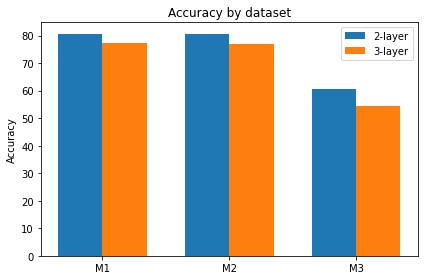

In [101]:
labels = ['M1', 'M2', 'M3']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, layer_2_model_accs, width, label='2-layer')
rects2 = ax.bar(x + width/2, layer_3_model_accs, width, label='3-layer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

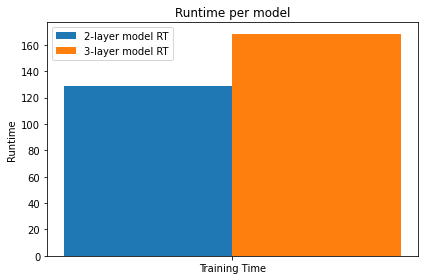

In [102]:
labels = ['Training Time']

layer_2_rt = [layer_2_training_time]
layer_3_rt = [layer_3_training_time]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, layer_2_rt, width, label='2-layer model RT')
rects2 = ax.bar(x + width/2, layer_3_rt, width, label='3-layer model RT')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime')
ax.set_title('Runtime per model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

For the same number of epochs, the 3-layer model perform worse than the 2-layer one, this might be because it has not converged yet, a best approach would be to evaluate them once we are sure they have both converged to a good-enough solution, or on the other hand, it could just be that the 3-layer model is just to complex to generalise well to the task. Also, the performance of both models on the test set is bad compared to how they perform on the validation data and the training data, this might be due to underfitting, the models do not generalise well to unseen data, a way to remedy this would be again to make the models converge. Also we can see that for the 2-layer model, tweaking the kernel size and adding padding does not make such a big difference, however, we can see that combining these for the 3-layer model cranks up the accuracy, a general rule would be that the bigger (longer and wider) CNN is, the more important it is to tune the parameters right. 

## D. Unsupervised learning on Fashion-MNIST

### D1. Dimensionality reduction and clustering

In [82]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5), (0.5))])
#Load the training data
train_set = datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set,
                                          shuffle=True)
#Load the test data
test_set = datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, 
                                         shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
print('Training set size:', len(train_set))
print('Test set size:',len(test_set))

Training set size: 60000
Test set size: 10000


(50, 5)


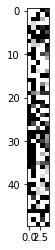

In [3]:
from numpy import linalg as LA
from sklearn.decomposition import PCA, IncrementalPCA


def show(img):
    npimg = img.numpy()
    plt.imshow(npimg)

x_class1 = np.zeros((6000, 28*28))
x_class2 = np.zeros((6000, 28*28))

counter_1 = 0
counter_2 = 0

v_1 = 0
v_2 = 0
pca = PCA(n_components=5)

for count, (x, y) in enumerate(train_loader):
    x = x.squeeze()
    x = x.reshape(-1)
    
    if y == 0:
        x_class1[counter_1] = x
        counter_1 += 1
    if y == 5:
        x_class2[counter_2] = x
        counter_2 += 1
        
img1 = pca.fit_transform(x_class1)[:50]
print(img1.shape)
plt.imshow(img1,interpolation='nearest',cmap=plt.cm.binary, vmin=-1, vmax=1)

(50, 5)


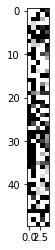

In [4]:
img2 = pca.fit_transform(x_class2)[:50]
print(img2.shape)
plt.imshow(img1,interpolation='nearest',cmap=plt.cm.binary, vmin=-1, vmax=1)

#### We now aim at reconstructing images by using 15 principal components

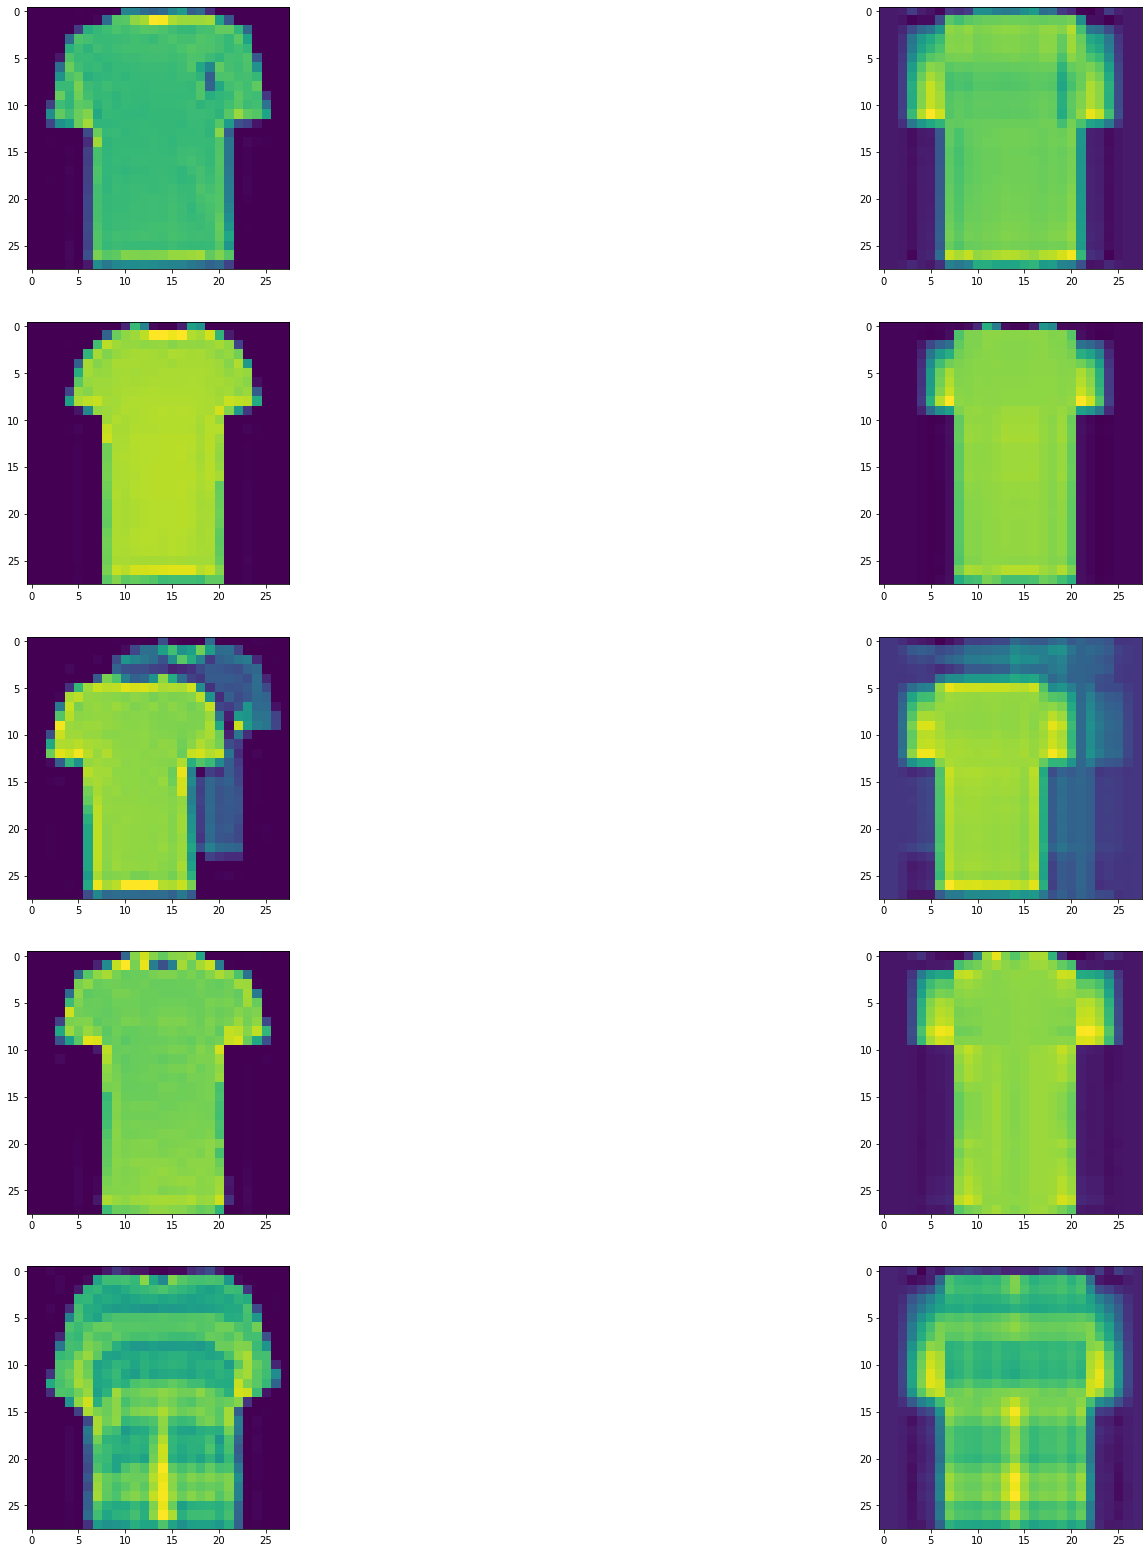

In [5]:
w = 10
h = 10
fig = plt.figure(figsize=(28, 28))
columns = 2
rows = 5

i = 1
for count, (x, y) in enumerate(train_loader):
    if i > 5 + 4:
        break
    if y == 0:
        img = x.squeeze()
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        i += 1
        pca = PCA(n_components=15) # playing with this n_components demonstrates the capacity to reconstruct
        pca.fit_transform(img)
        pca_reps_1 = pca.components_
        ipca = IncrementalPCA(n_components=2)
        reconstructed_image = ipca.inverse_transform(ipca.fit_transform(img))
        fig.add_subplot(rows, columns, i)
        plt.imshow(reconstructed_image)
        i += 1
        
plt.show()

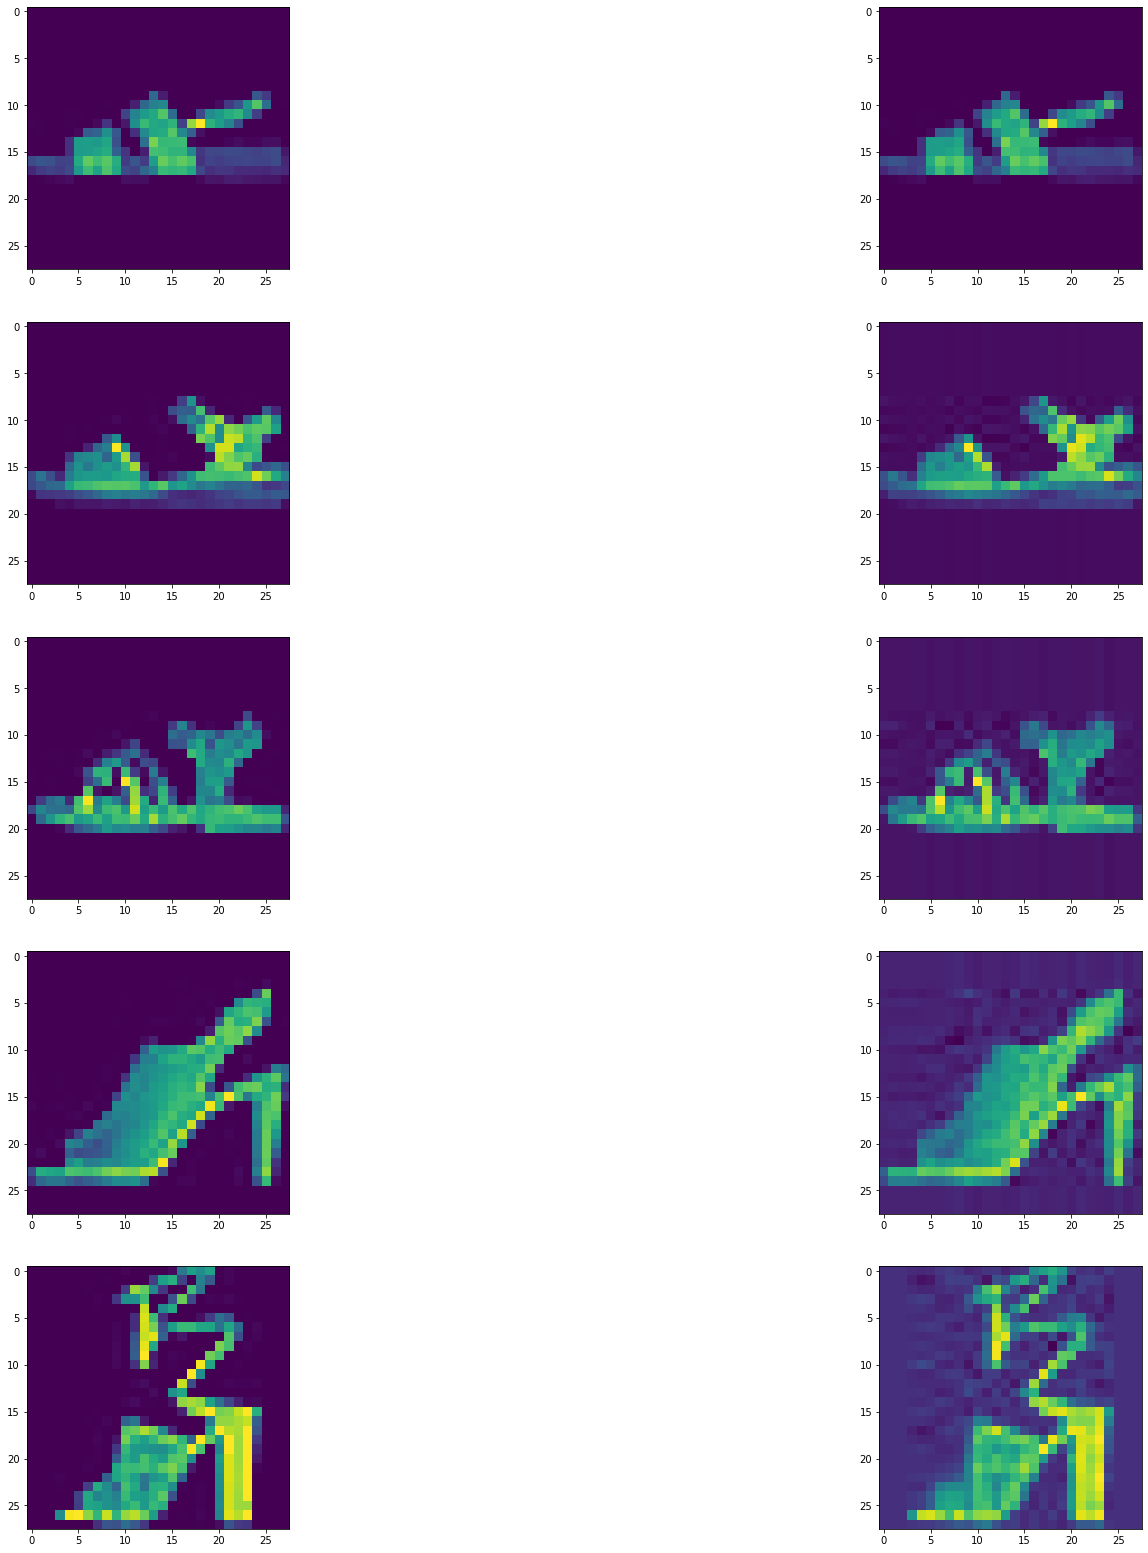

In [6]:
w = 10
h = 10
fig = plt.figure(figsize=(28, 28))
columns = 2
rows = 5

i = 1
for count, (x, y) in enumerate(train_loader):
    if i > 5+4:
        break
    if y == 5:
        img = x.squeeze()
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        i += 1
        pca = PCA(n_components=15)
        pca.fit_transform(img)
        pca_reps_2 = pca.components_
        ipca = IncrementalPCA(n_components=10)
        reconstructed_image = ipca.inverse_transform(ipca.fit_transform(img))
        fig.add_subplot(rows, columns, i)
        plt.imshow(reconstructed_image)
        i += 1
        
plt.show()

In [7]:
x1 = pca_reps_1[:][0]
y1 = pca_reps_1[:][1]

x2 = pca_reps_2[:][0]
y2 = pca_reps_2[:][1]

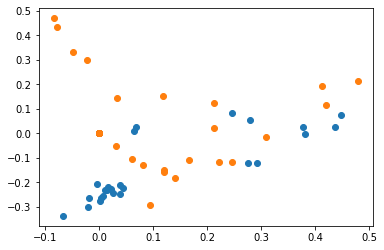

In [8]:
import random
random.seed(88246)
np.random.seed(88246)
torch.manual_seed(88246)

plt.scatter(x1, y1)
plt.scatter(x2, y2)

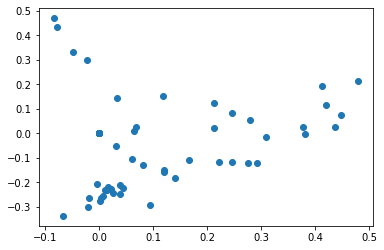

In [9]:
x = np.append(x1, x2)
y = np.append(y1, y2)
plt.scatter(x, y)

In [104]:
#print(x)
#print(y)
points = np.zeros((len(x), 2))
#print(points.shape)
for i in range(len(x)):
    points[i] = np.array([x[i],y[i]])
    
print(points)

[[-1.16784043e-17 -6.00753106e-17]
 [ 2.22044605e-16 -0.00000000e+00]
 [ 5.07753520e-02 -3.45530517e-02]
 [ 3.09940282e-01 -1.99484315e-01]
 [ 3.98784979e-01 -1.06934794e-01]
 [ 4.01585821e-01  5.28783160e-02]
 [ 3.06192814e-01  2.95188943e-01]
 [ 6.27497109e-02  3.86469852e-01]
 [-1.50753290e-02  1.00767874e-01]
 [-1.89649844e-02  1.41911415e-01]
 [-1.69380105e-02  2.06239623e-01]
 [-1.14660977e-02  2.35401741e-01]
 [-9.76580294e-03  2.40186146e-01]
 [-2.29483909e-03  1.01979515e-01]
 [-2.44295468e-04  1.38118495e-01]
 [-3.05791410e-03  2.47137375e-01]
 [-3.04233818e-03  2.50177400e-01]
 [-7.17713616e-03  2.23129537e-01]
 [-2.29856144e-02  1.42624551e-01]
 [-1.14324182e-02  1.23713859e-01]
 [ 1.35228330e-02  2.69053811e-01]
 [ 1.52889181e-01  4.03652265e-01]
 [ 4.11640582e-01  5.94498173e-02]
 [ 3.78693495e-01 -6.13934637e-02]
 [ 3.13857902e-01 -1.79821357e-01]
 [ 2.08751964e-01 -9.33738101e-02]
 [ 5.50696467e-02  9.77508891e-03]
 [-0.00000000e+00 -0.00000000e+00]
 [ 2.96454142e-02 -5

In [105]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,
         assign_labels='discretize',
         random_state=42).fit(points)

In [106]:
#print(clustering.labels_)
class_1_x = np.zeros(len(x))
class_1_y = np.zeros(len(x))
class_2_x = np.zeros(len(x))
class_2_y = np.zeros(len(x))
for i in range(len(clustering.labels_)):
    if clustering.labels_[i] == 0:
        class_1_x[i] = points[i][0]
        class_1_y[i] = points[i][1]
    if clustering.labels_[i] == 1:
        class_2_x[i] = points[i][0]
        class_2_y[i] = points[i][1]

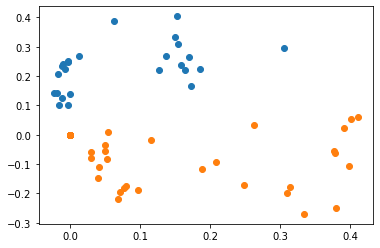

In [107]:
plt.scatter(class_1_x, class_1_y)
plt.scatter(class_2_x, class_2_y)

In [83]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(in_channels=1, out_channels=14, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=14, out_channels=28, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=28, out_channels=36, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 36, out_channels=42, kernel_size=3,  stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=42, out_channels=52, kernel_size=5, stride = 1, padding = 1),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(52, 42, 5, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(42, 36, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(36, 28, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(28, 14, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(14, 1, 3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
myAE = Autoencoder()
params = list(myAE.parameters())
print(len(params))

20


In [84]:
#Load the training data
train_set = datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set,
                                          shuffle=True)

learning_rate=0.001
max_epochs = 20

criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
losses = []

#Start training
for epoch in range(max_epochs):
    a = 0    
    total = 0
    for count, data in enumerate(train_loader):
        img, label = data
        if label == 5 or label == 0:
            if a == 0:
                batch_size = 0
                batch = img
                a += 1
            else:
                batch = np.append(batch, img, axis = 0)
            batch_size += 1
        
        if isinstance(batch, np.ndarray):
            batch = torch.from_numpy(batch)
            
        if batch_size > 31:
            #print(batch.shape)
            total += batch_size
            a = 0
            optimizer.zero_grad()
            recon = myAE(batch)
            loss = criterion(recon, batch)
            loss.backward()
            optimizer.step() 
                        
        if total > 2000:
            break
    
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    losses.append(loss)

Epoch:1, Loss:0.0177
Epoch:2, Loss:0.0058
Epoch:3, Loss:0.0045
Epoch:4, Loss:0.0030
Epoch:5, Loss:0.0024
Epoch:6, Loss:0.0019
Epoch:7, Loss:0.0020
Epoch:8, Loss:0.0011
Epoch:9, Loss:0.0010
Epoch:10, Loss:0.0009
Epoch:11, Loss:0.0008
Epoch:12, Loss:0.0008
Epoch:13, Loss:0.0005
Epoch:14, Loss:0.0004
Epoch:15, Loss:0.0004
Epoch:16, Loss:0.0003
Epoch:17, Loss:0.0003
Epoch:18, Loss:0.0008
Epoch:19, Loss:0.0004
Epoch:20, Loss:0.0020


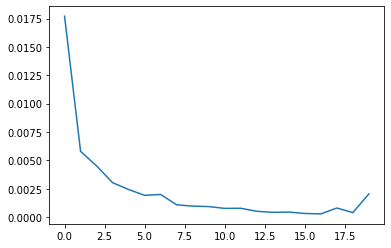

In [85]:
x = np.arange(20)
plt.plot(x, losses)

### D2. Observation

We can observe that the loss is indeed going down, therefore, we know the model is learning. However, we have no guarantee as for whether the model will behave correctly on unseen data as the loss does not reflect that as it might have overfit.  